<a href="https://colab.research.google.com/github/harryguiacorn/Trading-Analysis-Statistics/blob/main/London_Session_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf
import os
import datetime
import mplfinance as mpf

class SessionAnalysis:
    """
    A class for analyzing stock market sessions.

    Attributes:
      symbol: The symbol of the stock to analyze.
      period: The period of data to analyze.
      interval: The interval of data to analyze.
      output_folder: The folder to save the output files to.
      data: The stock market data.
    """
    def __init__(self, symbol: str, period: str, interval: str, output_folder: str):
      """
      Initializes a new SessionAnalysis object.

      Args:
        symbol: The symbol of the stock to analyze.
        period: The period of data to analyze.
        interval: The interval of data to analyze.
        output_folder: The folder to save the output files to.
      """

      self.symbol = symbol
      self.period = period
      self.interval = interval
      self.output_folder = output_folder
      self.data = None

    def create_folder(self, folder_path: str):
      """
      Creates a folder if it does not already exist.

      Args:
        folder_path: The path to the folder to create.
      """

      if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    def get_data(self) -> pd.DataFrame:
        """
        Downloads stock market data for the specified symbol, period, and interval.

        Returns:
          A Pandas DataFrame containing the stock market data.
        """

        self.data = yf.download(tickers=self.symbol, period=self.period, interval=self.interval)
        self.data.index = self.data.index.tz_convert('Europe/London')
        # print(self.data)
        return self.data


    def calculate_diff_between_hours(self, between_from=7, between_to=9):
        """
        Calculates the difference between the open price and closing price for the specified hours.

        Args:
          between_from: The start hour.
          between_to: The end hour.

        Returns:
          A Pandas DataFrame containing the difference between the open price and closing price.
        """

        # Filter rows between 7am and 9am
        time_from = datetime.time(between_from, 0, 0)
        time_from_string = time_from.strftime('%H:%M')
        time_to = datetime.time(between_to, 0, 0)
        time_to_string = time_to.strftime('%H:%M')
        filtered_data = self.data.between_time(time_from_string, time_to_string)

        # Calculate the difference between 7am open price and 9am closing price
        open_prices = filtered_data.loc[filtered_data.index.hour == between_from, 'Open']
        close_prices = filtered_data.loc[filtered_data.index.hour == between_to, 'Close']

        # print(open_prices, close_prices.values)

        # Calculate the difference and save it in a new DataFrame
        difference = pd.DataFrame(close_prices.values - open_prices.values, columns=['Difference'], index=open_prices.index)

        folder_path_csv = os.path.join(self.output_folder, 'csv', self.symbol)
        self.create_folder(folder_path_csv)
        chart_path = os.path.join(folder_path_csv, f'{self.symbol}-{time_from_string}-{time_to_string}.csv')
        # Save the dataframe to a CSV file
        difference.to_csv(chart_path)

    def save_charts_between_hours(self, between_from=9, between_to=20):
        """
        Saves candlestick charts for the specified hours.

        Args:
          between_from: The start hour.
          between_to: The end hour.
        """
        time_from = datetime.time(between_from, 11, 0)
        time_from_string = time_from.strftime('%H:%M')
        time_to = datetime.time(between_to, 14, 0)
        time_to_string = time_to.strftime('%H:%M')

        # Create folders for CSV and image files
        folder_path_img = os.path.join(self.output_folder, 'img', self.symbol)

        self.create_folder(folder_path_img)

        # Filter the data for the specified time range (09:00 - 11:00)
        filtered_data = self.data.between_time(time_from_string, time_to_string)  # EST time

        # Create and save candlestick charts for each day in the specified time range
        for date, group in filtered_data.groupby(filtered_data.index.date):
            date_str = date.strftime('%Y-%m-%d')
            time_str = group.index[0].strftime('%H-%M')
            chart_filename = f'{self.symbol}_{date_str}_{time_str}_candlestick_chart.png'
            chart_path = os.path.join(folder_path_img, chart_filename)
            mpf.plot(group, type='candle', savefig=chart_path, title=f'{self.symbol} {date} {self.interval} Candlestick Chart', figratio=(2,1), style='yahoo')
            mpf.plot(group, type='candle', title=f'{self.symbol} {date} {self.interval} Candlestick Chart', figratio=(2,1), style='yahoo')
            print(f"Candlestick chart for {self.symbol} on {date} saved as {chart_path}")

if __name__ == "__main__":
    symbol = 'ES=F'
    period = '5d' # 6mo ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
    interval = '1h' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
    output_folder = 'session-output'

    analyzer = SessionAnalysis(symbol, period, interval, output_folder)
    analyzer.get_data()
    analyzer.calculate_diff_between_hours()
    analyzer.save_charts_between_hours()

[*********************100%***********************]  1 of 1 completed


                        Open     High      Low    Close  Adj Close  Volume
Datetime                                                                  
2024-09-12 00:00:00  5567.50  5569.25  5567.00  5568.75    5568.75     702
2024-09-12 00:15:00  5568.75  5569.00  5566.50  5568.50    5568.50    1103
2024-09-12 00:30:00  5568.50  5570.50  5568.25  5570.00    5570.00    1664
2024-09-12 00:45:00  5570.00  5570.50  5568.50  5570.00    5570.00    1070
2024-09-12 01:00:00  5569.75  5570.00  5568.75  5569.50    5569.50     958
...                      ...      ...      ...      ...        ...     ...
2024-10-11 15:45:00  5863.75  5866.25  5859.00  5859.75    5859.75   94704
2024-10-11 16:00:00  5859.50  5861.25  5855.75  5855.75    5855.75   33713
2024-10-11 16:15:00  5855.75  5856.75  5854.50  5855.50    5855.50    5635
2024-10-11 16:30:00  5855.25  5855.75  5852.75  5854.50    5854.50    3969
2024-10-11 16:45:00  5854.75  5855.25  5853.00  5853.25    5853.25    6996

[1971 rows x 6 columns]


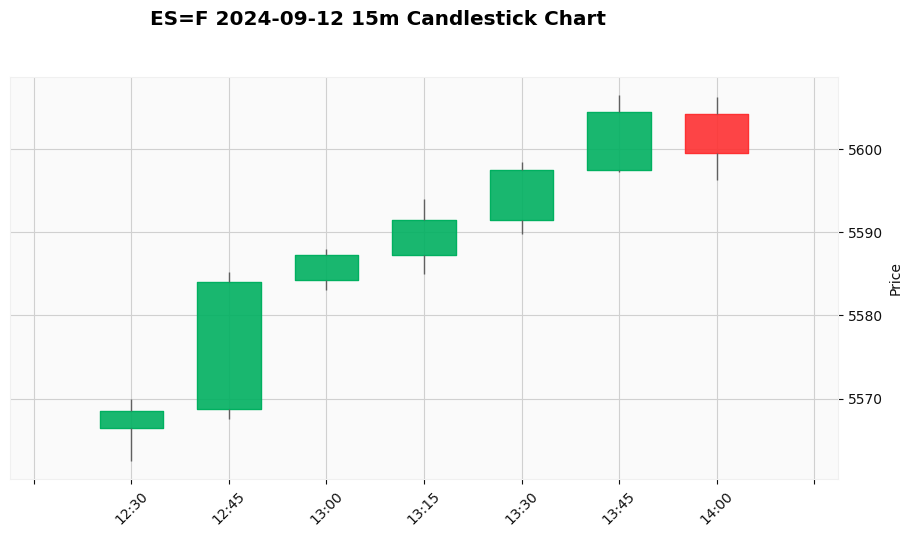

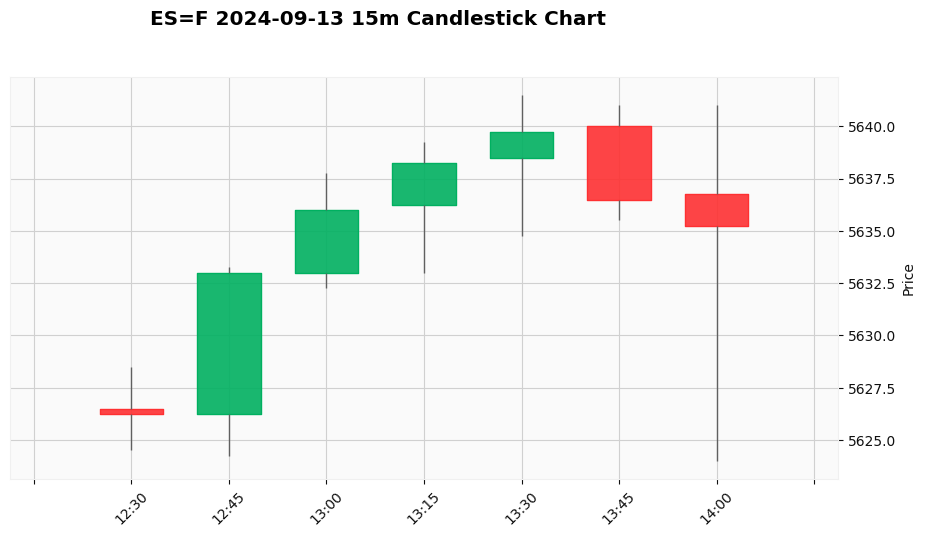

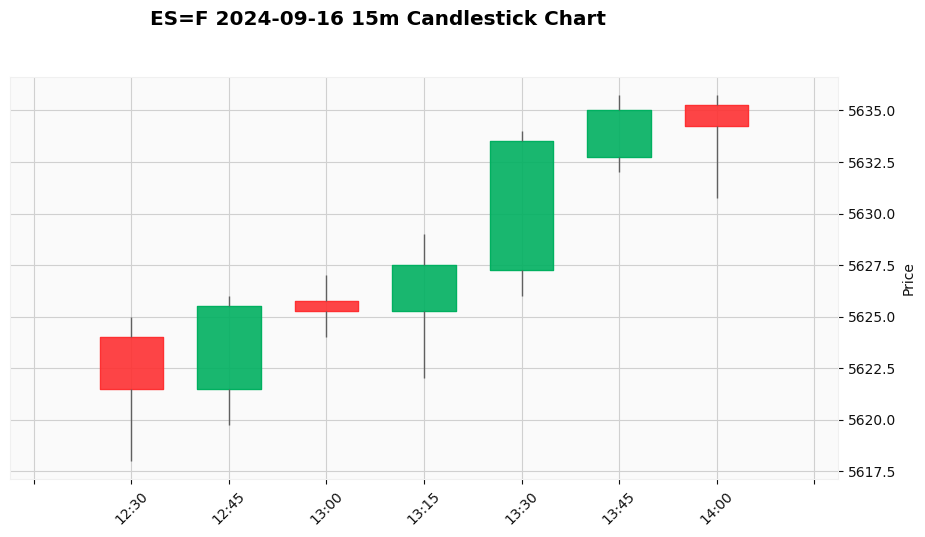

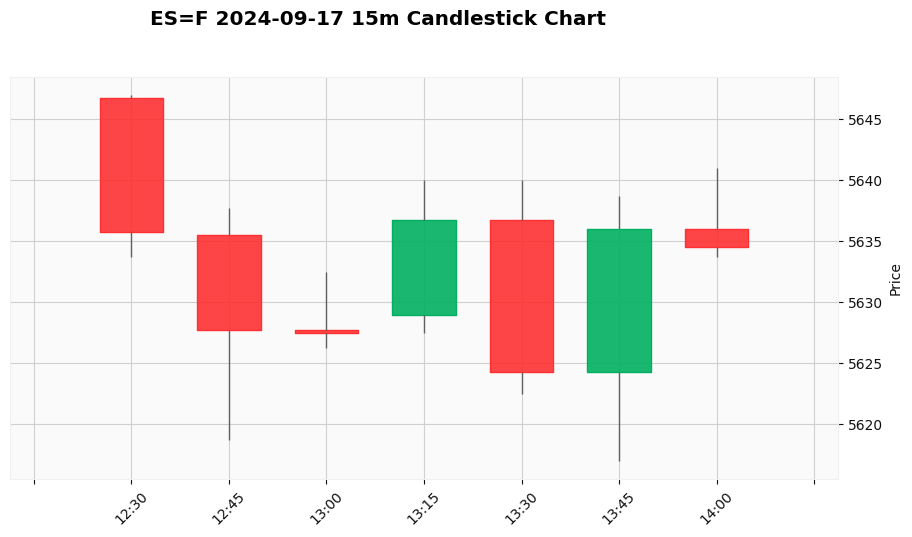

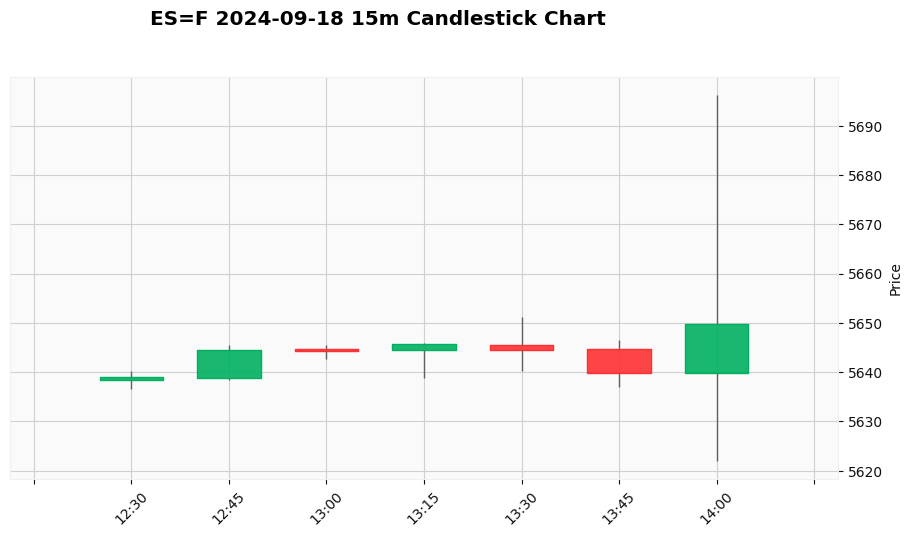

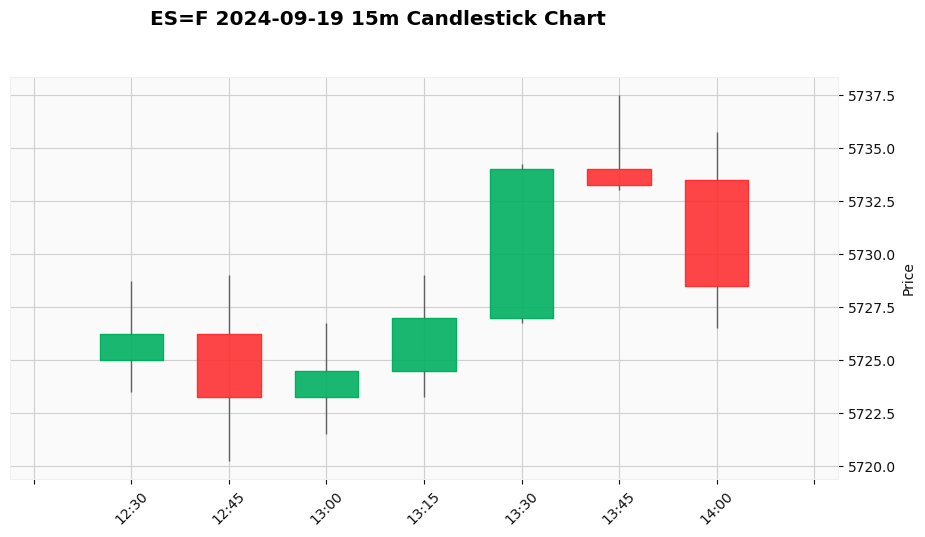

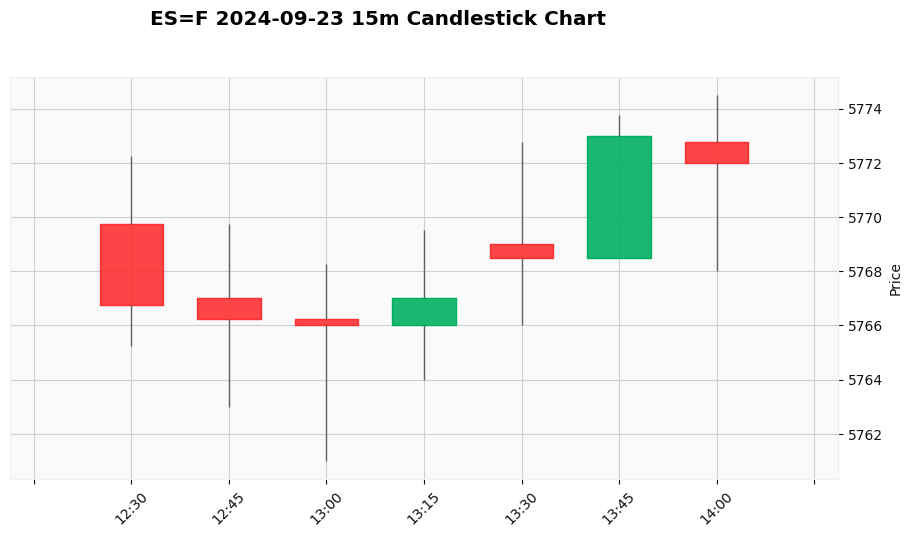

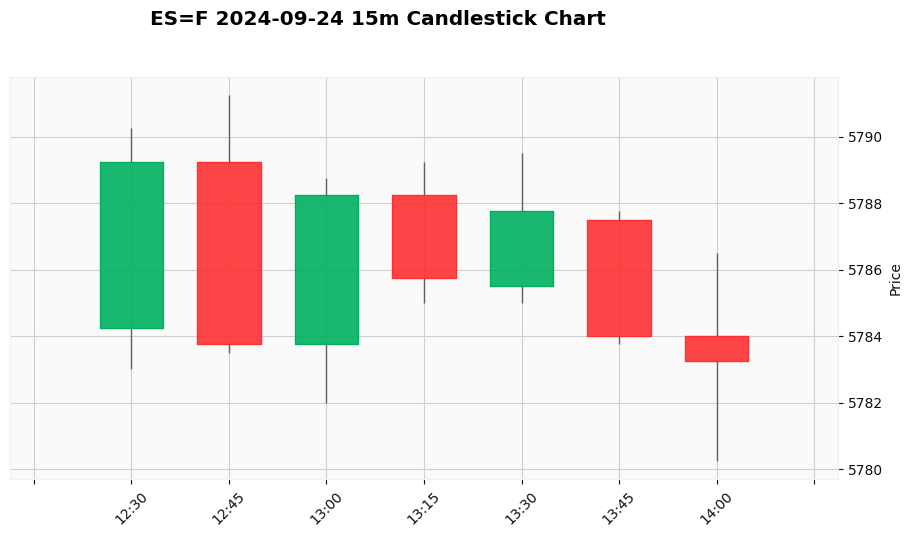

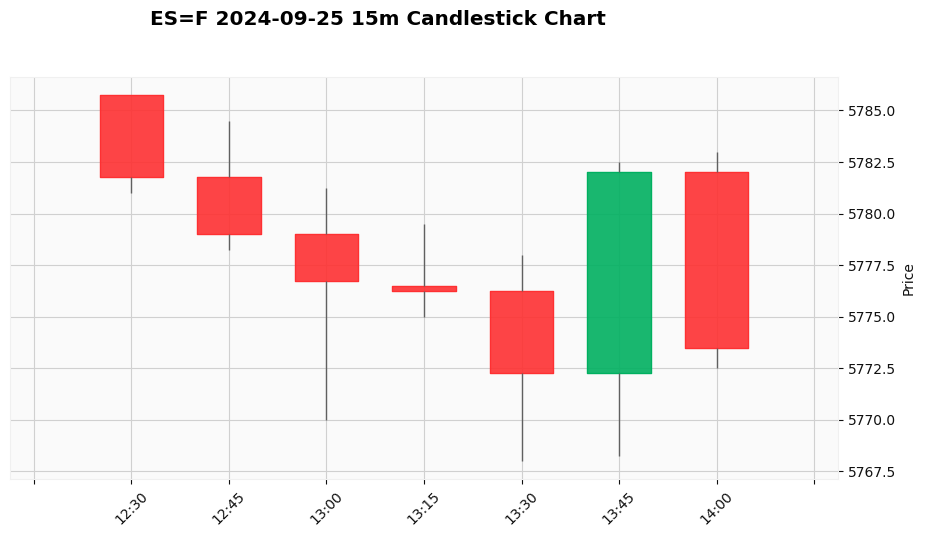

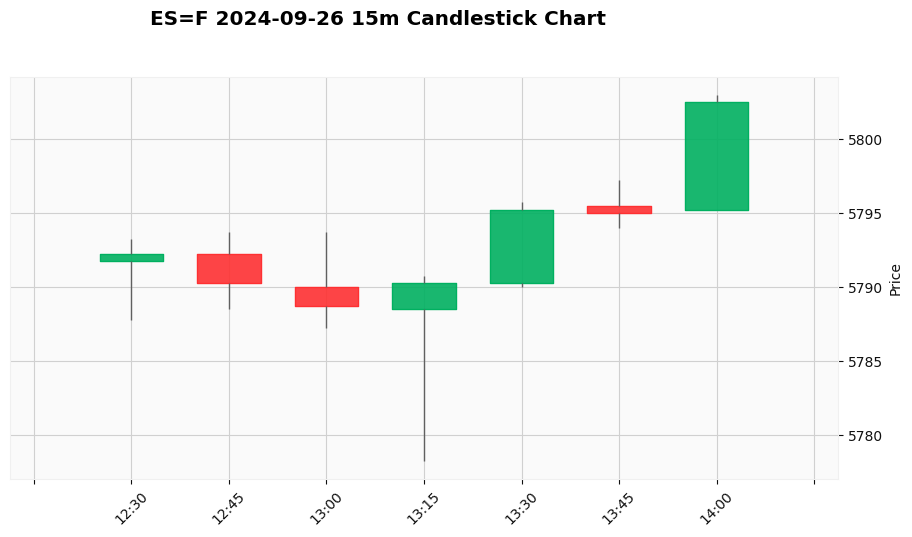

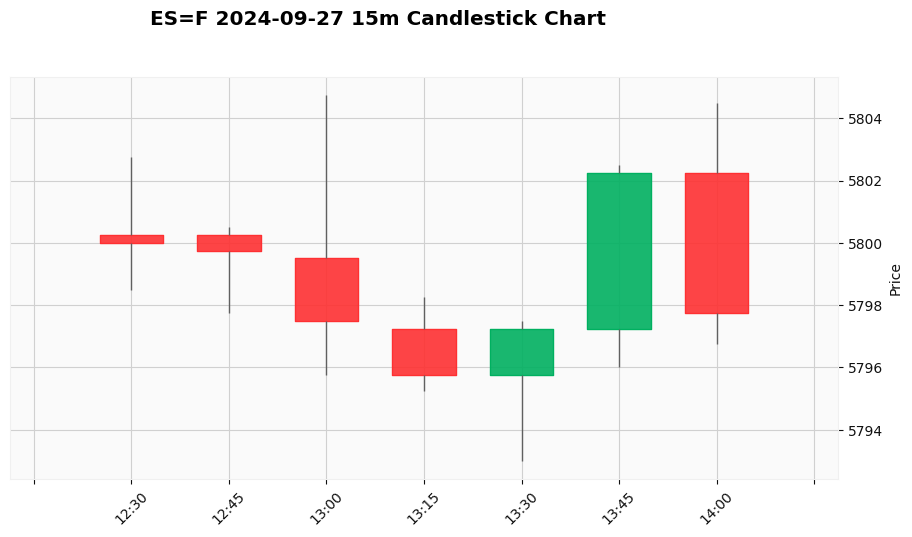

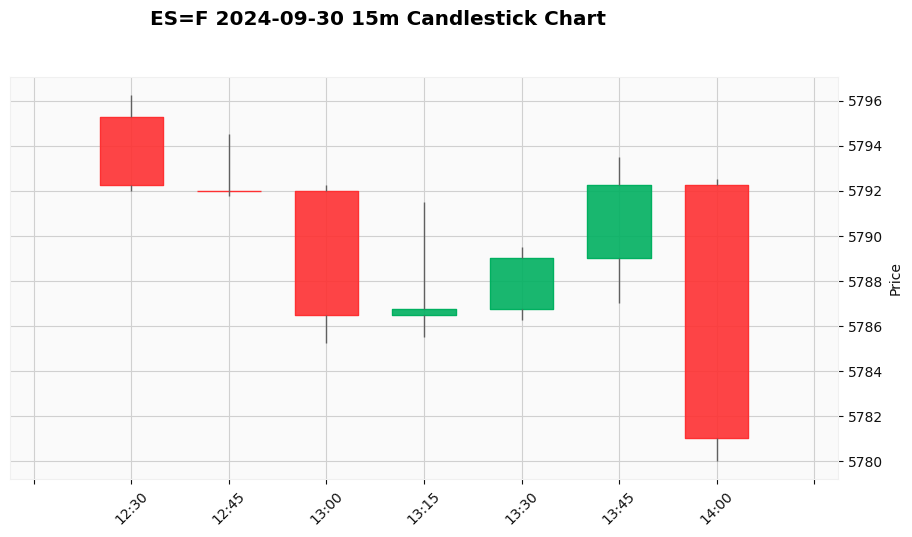

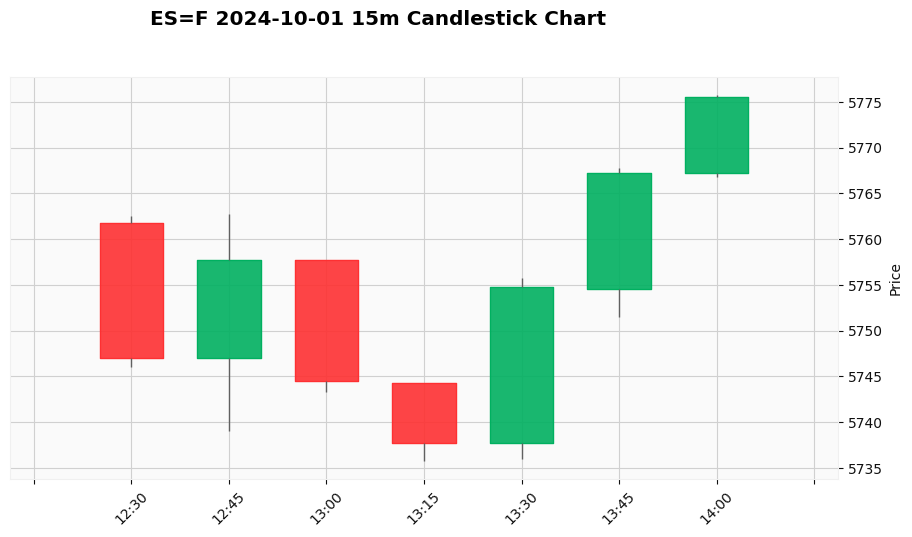

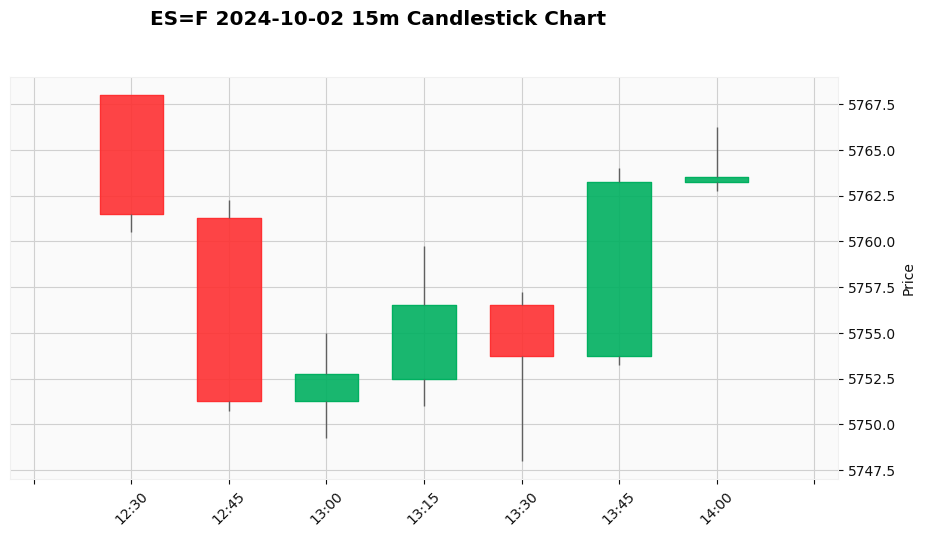

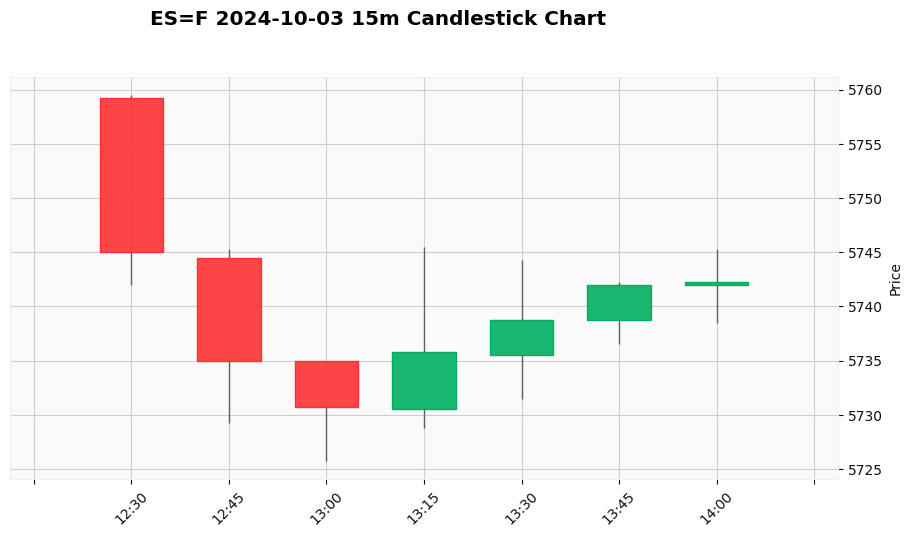

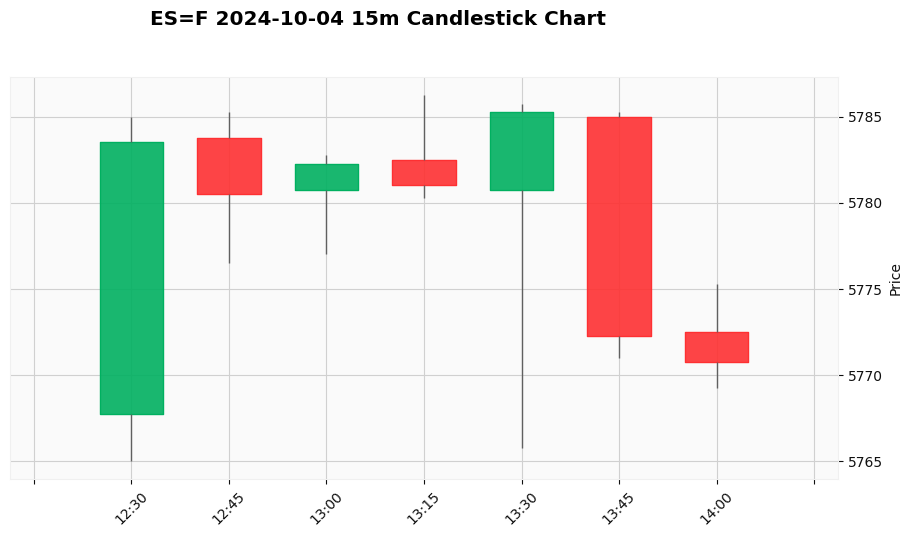

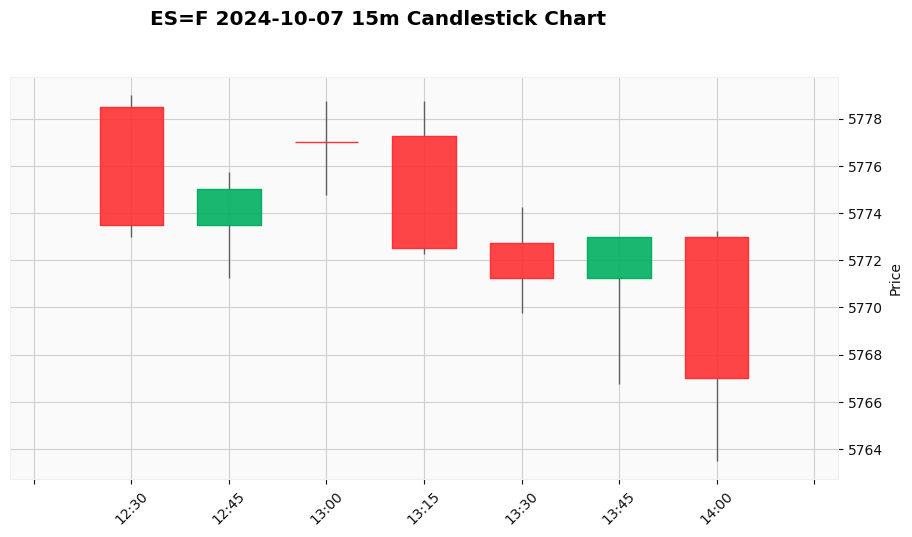

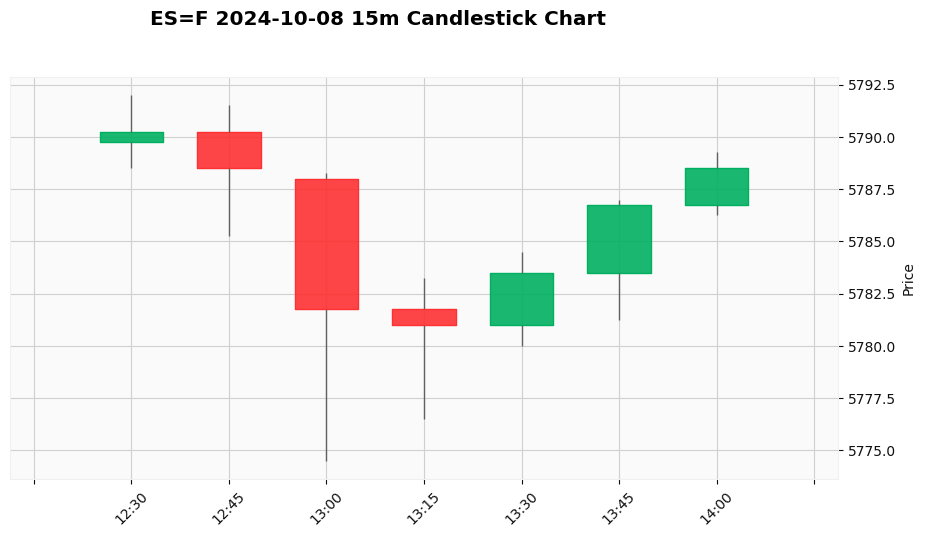

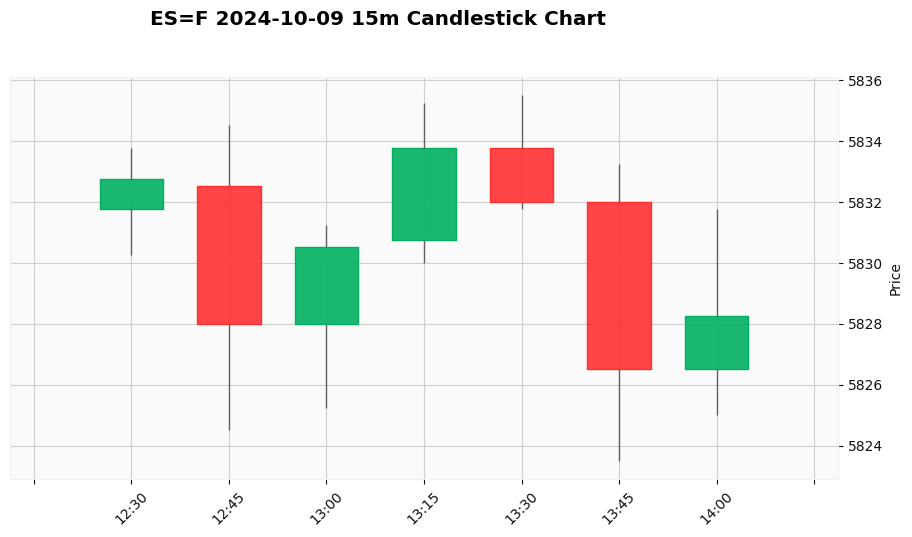

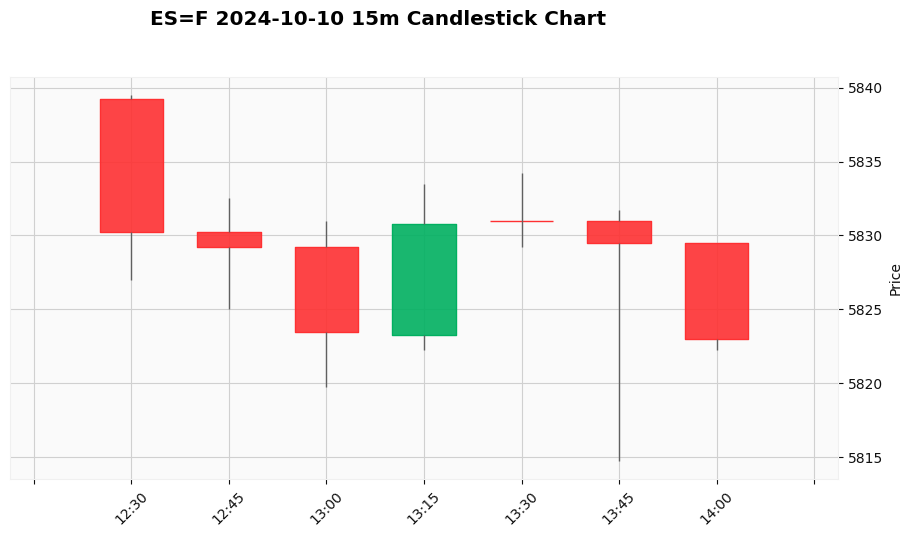

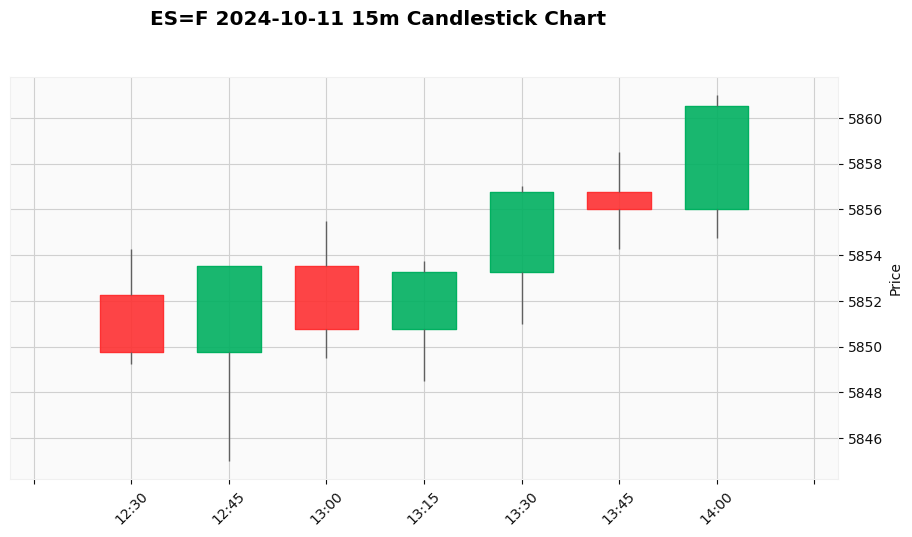

In [ ]:
import pandas as pd
import yfinance as yf
import os
import datetime
import mplfinance as mpf

class SessionAnalysis:
    """
    A class for analyzing stock market sessions on a minute-to-minute basis.

    Attributes:
      symbol: The symbol of the stock to analyze.
      period: The period of data to analyze.
      interval: The interval of data to analyze.
      output_folder: The folder to save the output files to.
      data: The stock market data.
    """
    def __init__(self, symbol: str, period: str, interval: str, output_folder: str):
        """
        Initializes a new SessionAnalysis object.

        Args:
          symbol: The symbol of the stock to analyze.
          period: The period of data to analyze.
          interval: The interval of data to analyze.
          output_folder: The folder to save the output files to.
        """
        self.symbol = symbol
        self.period = period
        self.interval = interval
        self.output_folder = output_folder
        self.data = None

    def create_folder(self, folder_path: str):
        """
        Creates a folder if it does not already exist.

        Args:
          folder_path: The path to the folder to create.
        """
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

    def get_data(self) -> pd.DataFrame:
        """
        Downloads stock market data for the specified symbol, period, and interval.

        Returns:
          A Pandas DataFrame containing the stock market data.
        """
        self.data = yf.download(tickers=self.symbol, period=self.period, interval=self.interval)

        # Localize the timestamps to UTC before converting to London time
        # self.data.index = self.data.index.tz_localize('UTC').tz_convert('Europe/London')
        print(self.data)
        return self.data

    def calculate_diff_between_minutes(self, from_hour=7, from_minute=0, to_hour=9, to_minute=0):
        """
        Calculates the difference between the open price and closing price for the specified minute range.

        Args:
          from_hour: The start hour.
          from_minute: The start minute.
          to_hour: The end hour.
          to_minute: The end minute.

        Returns:
          A Pandas DataFrame containing the difference between the open price and closing price.
        """
        # Create time range for filtering
        time_from = datetime.time(from_hour, from_minute)
        time_to = datetime.time(to_hour, to_minute)

        # Filter rows between the specified times
        filtered_data = self.data.between_time(time_from.strftime('%H:%M'), time_to.strftime('%H:%M'))

        # Calculate the difference between the open price at the start and close price at the end
        open_prices = filtered_data.loc[filtered_data.index.time == time_from, 'Open']
        close_prices = filtered_data.loc[filtered_data.index.time == time_to, 'Close']

        # Calculate the difference and save it in a new DataFrame
        difference = pd.DataFrame(close_prices.values - open_prices.values, columns=['Difference'], index=open_prices.index)

        folder_path_csv = os.path.join(self.output_folder, 'csv', self.symbol)
        self.create_folder(folder_path_csv)
        chart_path = os.path.join(folder_path_csv, f'{self.symbol}-{time_from.strftime("%H-%M")}-{time_to.strftime("%H-%M")}.csv')

        # Save the dataframe to a CSV file
        difference.to_csv(chart_path)

    def save_charts_between_minutes(self, from_hour=9, from_minute=0, to_hour=20, to_minute=0):
        """
        Saves candlestick charts for the specified minute range.

        Args:
          from_hour: The start hour.
          from_minute: The start minute.
          to_hour: The end hour.
          to_minute: The end minute.
        """
        time_from = datetime.time(from_hour, from_minute)
        time_to = datetime.time(to_hour, to_minute)

        # Create folders for CSV and image files
        folder_path_img = os.path.join(self.output_folder, 'img', self.symbol)
        self.create_folder(folder_path_img)

        # Filter the data for the specified time range
        filtered_data = self.data.between_time(time_from.strftime('%H:%M'), time_to.strftime('%H:%M'))

        # Create and save candlestick charts for each day in the specified time range
        for date, group in filtered_data.groupby(filtered_data.index.date):
            date_str = date.strftime('%Y-%m-%d')
            time_str = group.index[0].strftime('%H-%M')
            chart_filename = f'{self.symbol}_{date_str}_{time_str}_candlestick_chart.png'
            chart_path = os.path.join(folder_path_img, chart_filename)
            mpf.plot(group, type='candle', savefig=chart_path, title=f'{self.symbol} {date} {self.interval} Candlestick Chart', figratio=(2,1), style='yahoo')
            mpf.plot(group, type='candle', title=f'{self.symbol} {date} {self.interval} Candlestick Chart', figratio=(2,1), style='yahoo')
            # print(f"Candlestick chart for {self.symbol} on {date} saved as {chart_path}")
            # print(f"Candlestick chart for {self.symbol} on {date} saved as {chart_path}")


if __name__ == "__main__":
    symbol = 'ES=F'
    period = '1mo' # 6mo ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
    interval = '15m' # Changed interval to 1 minute
    output_folder = 'session-output-'

    analyzer = SessionAnalysis(symbol, period, interval, output_folder)
    analyzer.get_data()
    analyzer.calculate_diff_between_minutes(12,30,14,0)
    analyzer.save_charts_between_minutes(12,30,14,0)